# **Daily Min Temperature Deep Learning Time Series**

**Benedictus Bayu Pramudhito**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [2]:
import os
print('\n'.join(os.listdir(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)')))

bottle.csv
References
Untitled0.ipynb
Week_1_Python_1.ipynb
heart.csv
pima-indians-diabetes.csv
sonar.csv
housing.csv
winequality-white.csv
auto.csv
sales.csv
birth.csv
shampoo.csv
daily-min-temperatures.csv
Quiz
customer.csv
iris.csv
iris (1).csv
Bootcamp Images
parkinsons
numbers_dataset
bottle-updated.csv
auto-mpg.csv
auto (1).csv


In [3]:
def parser(x):
  return datetime.strptime(x, '%Y-%m-%d')

In [9]:
df = pd.read_csv(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)/daily-min-temperatures.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

df.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

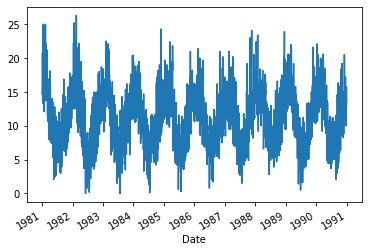

In [10]:
df.plot()
plt.show()

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from math import sqrt

**Processing Time Series Data**

In [12]:
def timeseries_to_supervised(data, lag=1):
  dataset = pd.DataFrame(data)
  columns = [dataset.shift(i) for i in range(1, lag+1)]
  columns.append(dataset)
  dataset = pd.concat(columns, axis=1)
  return dataset

def difference(df, interval=1):
  diff = list()
  for i in range(interval, len(df)):
    value = df[i]- df[i - interval]
    diff.append(value)
  return pd.Series(diff)

In [13]:
lag = 1

raw_values = df.values
diff_values = difference(raw_values, 1)

diff_values

0      -2.8
1       0.9
2      -4.2
3       1.2
4       0.0
       ... 
3644   -0.6
3645   -0.4
3646   -0.1
3647    2.2
3648   -2.7
Length: 3649, dtype: float64

In [14]:
supervised = timeseries_to_supervised(diff_values, lag)
supervised

,0,0
0,NaN,-2.8
1,-2.8,0.9
2,0.9,-4.2
3,-4.2,1.2
4,1.2,0.0
...,...,...
3644,1.7,-0.6
3645,-0.6,-0.4
3646,-0.4,-0.1
3647,-0.1,2.2


In [15]:
supervised_values = supervised.values[lag:,:]
supervised_values

array([[-2.8,  0.9],
       [ 0.9, -4.2],
       [-4.2,  1.2],
       ...,
       [-0.4, -0.1],
       [-0.1,  2.2],
       [ 2.2, -2.7]])

In [16]:
split_percentage = 0.75

train_size = int(split_percentage * len(supervised_values))

train, test = supervised_values[0:train_size], supervised_values[train_size:len(supervised_values)]

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1)) # Range hasil scaling menjadi angka diantara -1 hingga 1
scaler = scaler.fit(train)

train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

In [18]:
train_scaled

array([[-0.11607143,  0.21428571],
       [ 0.21428571, -0.24107143],
       [-0.24107143,  0.24107143],
       ...,
       [-0.16071429,  0.375     ],
       [ 0.375     ,  0.125     ],
       [ 0.125     , -0.16071429]])

## **Baseline Model**

In [19]:
neurons = 1
epoch = 1000
batch_size = 32

X_train, y_train = train_scaled[:, 0:-1], train_scaled[:, -1]
X_test, y_test = test_scaled[:, 0:-1], test_scaled[:, -1]

model = Sequential()
model.add(Dense(neurons, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/1000
86/86 [==============================] - 0s 2ms/step - loss: 0.1013 - val_loss: 0.0741
Epoch 2/1000
86/86 [==============================] - 0s 839us/step - loss: 0.0691 - val_loss: 0.0589
Epoch 3/1000
86/86 [==============================] - 0s 763us/step - loss: 0.0610 - val_loss: 0.0556
Epoch 4/1000
86/86 [==============================] - 0s 756us/step - loss: 0.0592 - val_loss: 0.0549
Epoch 5/1000
86/86 [==============================] - 0s 839us/step - loss: 0.0588 - val_loss: 0.0547
Epoch 6/1000
86/86 [==============================] - 0s 746us/step - loss: 0.0588 - val_loss: 0.0547
Epoch 7/1000
86/86 [==============================] - 0s 815us/step - loss: 0.0587 - val_loss: 0.0546
Epoch 8/1000
86/86 [==============================] - 0s 776us/step - loss: 0.0587 - val_loss: 0.0546
Epoch 9/1000
86/86 [==============================] - 0s 806us/step - loss: 0.0587 - val_loss: 0.0546
Epoch 10/1000
86/86 [==============================] - 0s 785us/step - loss: 0.0587 

In [20]:
loss = model.evaluate(X_test, y_test, verbose=2)

print('Test loss:', loss)

29/29 - 0s - loss: 0.0545
Test loss: 0.054481346160173416


In [21]:
def plot_loss_new(history):
  history_df = pd.DataFrame(history.history)

  min_loss_index = history_df[history_df['loss']==min(history_df['loss'])].index.values
  min_loss = history_df.loc[min_loss_index]['loss']
  min_val_loss_index = history_df[history_df['val_loss']==min(history_df['val_loss'])].index.values
  min_val_loss = history_df.loc[min_val_loss_index]['val_loss']

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.plot(min_loss_index, min_loss, 'o', c='k', ms=4, label='min loss')
  plt.plot(min_val_loss_index, min_val_loss, 'o', c='k', ms=4, label='min val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

  print('Minimum Loss             :', min_loss)
  print()
  print('Minimum Validation Loss  :', min_val_loss)

In [22]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
161,0.058687,0.054413,161
127,0.058676,0.054413,127
120,0.058688,0.054414,120
153,0.058684,0.054414,153
97,0.058672,0.054414,97
...,...,...,...
4,0.058823,0.054740,4
3,0.059173,0.054857,3
2,0.060975,0.055561,2
1,0.069148,0.058913,1


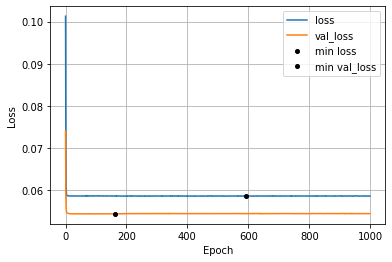

Minimum Loss             : 593    0.058622
Name: loss, dtype: float64

Minimum Validation Loss  : 161    0.054413
Name: val_loss, dtype: float64


In [23]:
plot_loss_new(history)

## **Deeper Model**

In [24]:
neurons = 1
epoch = 1000
batch_size = 32

deeper = Sequential()
deeper.add(Dense(neurons, activation='relu', input_dim=X_train.shape[1]))
deeper.add(Dense(5, activation='relu'))
deeper.add(Dense(1))
deeper.compile(loss='mean_squared_error', optimizer='adam')

history_deep = deeper.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/1000
86/86 [==============================] - 0s 2ms/step - loss: 0.0672 - val_loss: 0.0585
Epoch 2/1000
86/86 [==============================] - 0s 921us/step - loss: 0.0618 - val_loss: 0.0559
Epoch 3/1000
86/86 [==============================] - 0s 830us/step - loss: 0.0599 - val_loss: 0.0548
Epoch 4/1000
86/86 [==============================] - 0s 925us/step - loss: 0.0590 - val_loss: 0.0542
Epoch 5/1000
86/86 [==============================] - 0s 874us/step - loss: 0.0587 - val_loss: 0.0541
Epoch 6/1000
86/86 [==============================] - 0s 816us/step - loss: 0.0585 - val_loss: 0.0542
Epoch 7/1000
86/86 [==============================] - 0s 779us/step - loss: 0.0584 - val_loss: 0.0540
Epoch 8/1000
86/86 [==============================] - 0s 824us/step - loss: 0.0584 - val_loss: 0.0540
Epoch 9/1000
86/86 [==============================] - 0s 835us/step - loss: 0.0584 - val_loss: 0.0540
Epoch 10/1000
86/86 [==============================] - 0s 840us/step - loss: 0.0584 

In [25]:
history_deep_df = pd.DataFrame(history_deep.history)
history_deep_df['epoch'] = history_deep.epoch
history_deep_df.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
109,0.058426,0.053939,109
113,0.058435,0.053939,113
101,0.058396,0.053940,101
140,0.058445,0.053941,140
130,0.058376,0.053941,130
...,...,...,...
808,0.058209,0.054475,808
177,0.058295,0.054500,177
2,0.059884,0.054755,2
1,0.061773,0.055899,1


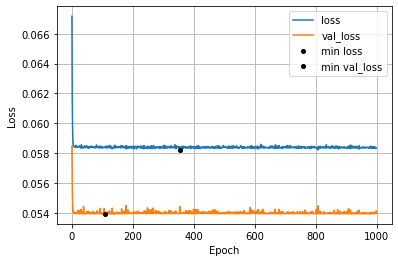

Minimum Loss             : 354    0.0582
Name: loss, dtype: float64

Minimum Validation Loss  : 109    0.053939
Name: val_loss, dtype: float64


In [26]:
plot_loss_new(history_deep)

## **Wider Model**

In [27]:
neurons = 50
epoch = 1000
batch_size = 32

wider = Sequential()
wider.add(Dense(neurons, activation='relu', input_dim=X_train.shape[1]))
wider.add(Dense(1))
wider.compile(loss='mean_squared_error', optimizer='adam')

history_wide = wider.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/1000
86/86 [==============================] - 0s 2ms/step - loss: 0.0623 - val_loss: 0.0542
Epoch 2/1000
86/86 [==============================] - 0s 885us/step - loss: 0.0588 - val_loss: 0.0540
Epoch 3/1000
86/86 [==============================] - 0s 985us/step - loss: 0.0587 - val_loss: 0.0540
Epoch 4/1000
86/86 [==============================] - 0s 962us/step - loss: 0.0587 - val_loss: 0.0539
Epoch 5/1000
86/86 [==============================] - 0s 1ms/step - loss: 0.0582 - val_loss: 0.0549
Epoch 6/1000
86/86 [==============================] - 0s 1ms/step - loss: 0.0585 - val_loss: 0.0540
Epoch 7/1000
86/86 [==============================] - 0s 965us/step - loss: 0.0582 - val_loss: 0.0539
Epoch 8/1000
86/86 [==============================] - 0s 968us/step - loss: 0.0582 - val_loss: 0.0538
Epoch 9/1000
86/86 [==============================] - 0s 1ms/step - loss: 0.0581 - val_loss: 0.0540
Epoch 10/1000
86/86 [==============================] - 0s 1ms/step - loss: 0.0581 - val_lo

In [28]:
history_wide_df = pd.DataFrame(history_wide.history)
history_wide_df['epoch'] = history_wide.epoch
history_wide_df.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
94,0.058183,0.053740,94
32,0.057958,0.053744,32
70,0.057937,0.053753,70
55,0.058068,0.053756,55
20,0.058155,0.053756,20
...,...,...,...
226,0.057670,0.054584,226
675,0.057470,0.054604,675
216,0.057777,0.054609,216
10,0.058307,0.054694,10


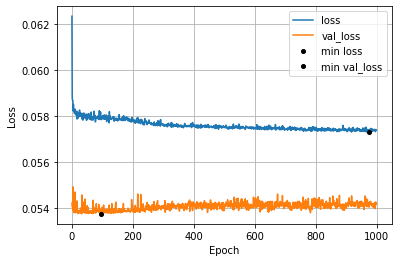

Minimum Loss             : 976    0.057291
Name: loss, dtype: float64

Minimum Validation Loss  : 94    0.05374
Name: val_loss, dtype: float64


In [29]:
plot_loss_new(history_wide)

## **LSTM Model**

In [30]:
from tensorflow.keras.layers import LSTM

In [32]:
epoch = 1000
batch_size = 32

X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

lstm = Sequential()
lstm.add(LSTM(50, activation='relu', input_dim=X_train.shape[1])) #50 LSTM block
lstm.add(Dense(1))
lstm.compile(optimizer='adam', loss='mean_squared_error')

history_lstm = lstm.fit(X_train_reshaped, y_train, epochs=epoch, batch_size=batch_size, validation_data=(X_test_reshaped, y_test))

Epoch 1/1000
86/86 [==============================] - 0s 3ms/step - loss: 0.0651 - val_loss: 0.0549
Epoch 2/1000
86/86 [==============================] - 0s 1ms/step - loss: 0.0591 - val_loss: 0.0541
Epoch 3/1000
86/86 [==============================] - 0s 1ms/step - loss: 0.0587 - val_loss: 0.0540
Epoch 4/1000
86/86 [==============================] - 0s 1ms/step - loss: 0.0586 - val_loss: 0.0539
Epoch 5/1000
86/86 [==============================] - 0s 1ms/step - loss: 0.0585 - val_loss: 0.0540
Epoch 6/1000
86/86 [==============================] - 0s 1ms/step - loss: 0.0584 - val_loss: 0.0540
Epoch 7/1000
86/86 [==============================] - 0s 1ms/step - loss: 0.0585 - val_loss: 0.0542
Epoch 8/1000
86/86 [==============================] - 0s 1ms/step - loss: 0.0584 - val_loss: 0.0539
Epoch 9/1000
86/86 [==============================] - 0s 1ms/step - loss: 0.0585 - val_loss: 0.0539
Epoch 10/1000
86/86 [==============================] - 0s 1ms/step - loss: 0.0584 - val_loss: 0.0539

In [33]:
history_lstm_df = pd.DataFrame(history_lstm.history)
history_lstm_df['epoch'] = history_lstm.epoch
history_lstm_df.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
654,0.057745,0.053743,654
655,0.057690,0.053749,655
663,0.057728,0.053759,663
660,0.057707,0.053759,660
276,0.057887,0.053761,276
...,...,...,...
193,0.057958,0.054285,193
77,0.058039,0.054479,77
103,0.057972,0.054538,103
143,0.057822,0.054564,143


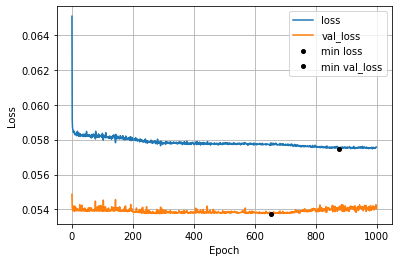

Minimum Loss             : 875    0.057459
Name: loss, dtype: float64

Minimum Validation Loss  : 654    0.053743
Name: val_loss, dtype: float64


In [34]:
plot_loss_new(history_lstm)

## **Kesimpulan**

Sweet spot val_loss pada tiap model

1. Baseline model : epoch 161 dengan val_loss 0.054413
2. Deeper Model : epoch 109 dengan val_loss 0.053939
3. Wider Model : epoch 94 dengan val_loss 0.05374
4. LSTM Model : epoch 652 dengan val_loss 0.053743

Arsitektur terbaik adalah arsitektur dengan Deep Learning Wider Model dan Deep Learning LSTM Model karena memiliki nilai val_loss yang paling kecil dibanding model lainnya
